POS là quá trình gán một phẩn nói với một phần loại từ ngữ cụ thể, như danh từ, động từ, tính từ, trạng từ, giới từ, mạo từ, số từ, từ nghi vấn, từ phủ định, từ hỏi, từ thán từ, từ liên kết,...

Ta có thể dùng nó để:
- Xác định tên các thực thể
- Nhận dạng giọng nói

### Markov Chain

Ta có thể sử dụng chuỗi Markov để xác định xác suất của từ tiếp theo. Ví dụ dưới đây, ta có thể thấy rằng từ có nhiều khả năng xảy ra nhất sau động từ là danh từ.

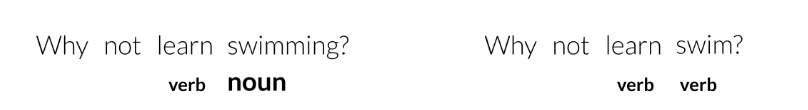

Để lập mô hình xác suất, chúng ta cần xác định xác suất của thẻ POS và của các từ.

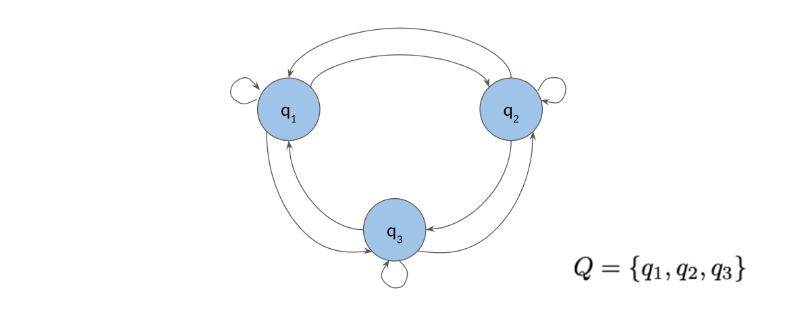

Các vòng tròn thể hiện trạng thái. Mỗi trạng thái sẽ đề cập đến một điều kiện nhất định của thời điểm hiện tại.

$Q = {q_1, q_2, q_3}$ là tập hợp các trạng thái

### Markov Chain và POS

Để giúp xác định các phần của lời nói cho mỗi từ, ta xây dựng một ma trận chuyển tiếp (transition matrix) $A$

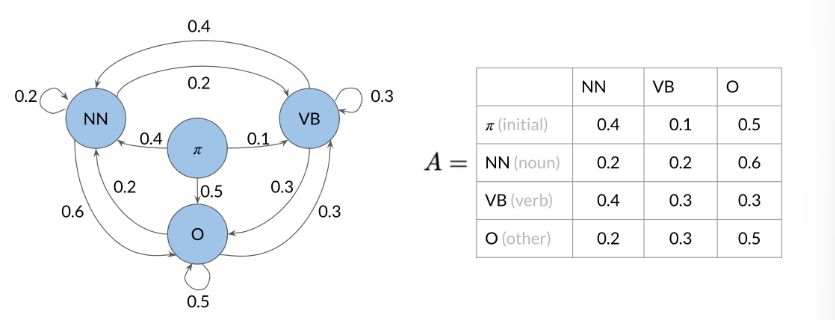

Các vòng tròn tương ứng với xác xuất chuyển đổi từ phần này sang phần khác. Dựa vào ma trận A, ta có thể thấy nó có 40% cơ hội sẽ bắt đầu một câu với một danh từ, 10% với động từ và 50% với các từ loại khác.

### Hidden Markov Model

Với mô hình Markov đơn giản ở trên, xác suất chuyển đổi cho phép xác định khả năng POS này sang POS khác. Nhưng trong mô hình Markov ẩn, ta sử dụng emission probabilities để xác định xác suất của từ tiếp theo.

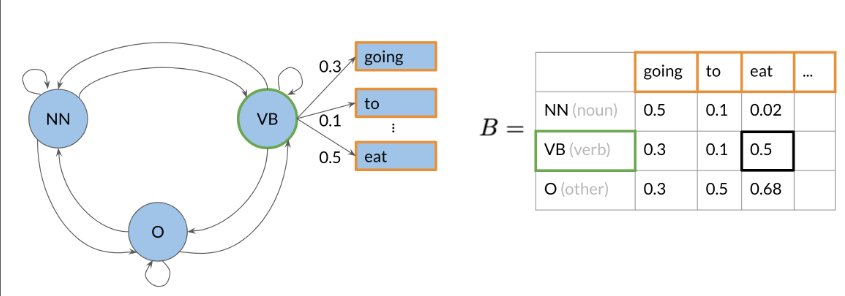

Ví dụ câu của ta bắt đầu bằng một Verb, ta sẽ chuyển qua các từ khác với xác suất nhất định. Emission probabilities *B* được dùng cùng với Transition matrix *A* để xác định phần lời nói của một từ trong câu.

Để có được *B*, ta chỉ cần có một tập dữ liệu được gắn nhãn và tính xác xuất đi từ POS đến từng từ trong tập dữ liệu.

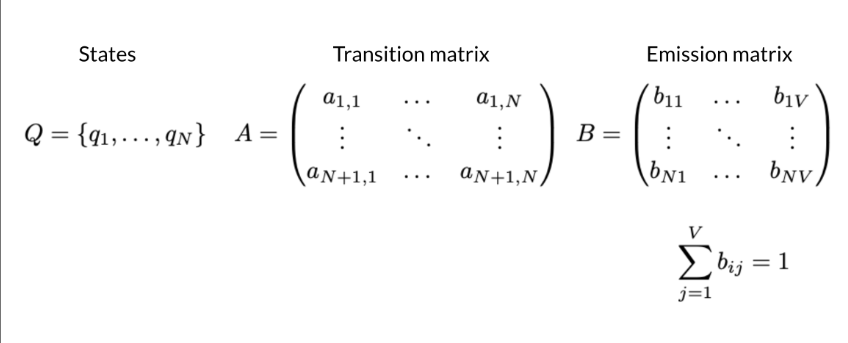

### Tính xác xuất

Dưới đây là hình ảnh minh họa về cách tính xác suất, cụ thể ta tính xác xuất xanh + tím:

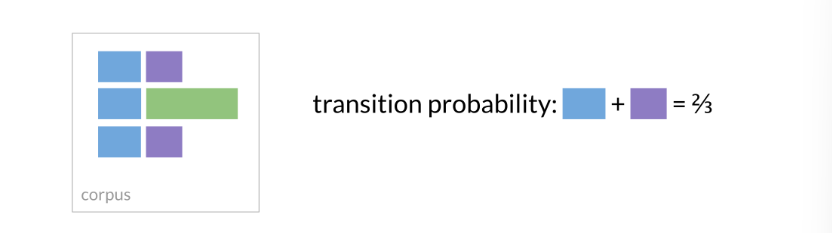

Số lần xanh + tím xuất hiện trên tổng tất cả là $P(xanh + tím) = \frac{2}{3}$. Ta dùng cách tính thương tự để điền vào ma trận A và B.

Trong ma trận A, ta đếm số lần $tag{t_{i - 1}, t_i}$ xuất hiện trên tổng số lần $t_{i - 1}$ xuất hiện gần nhau và chia cho tổng số lần $t_{i - 1}$ xuất hiện.

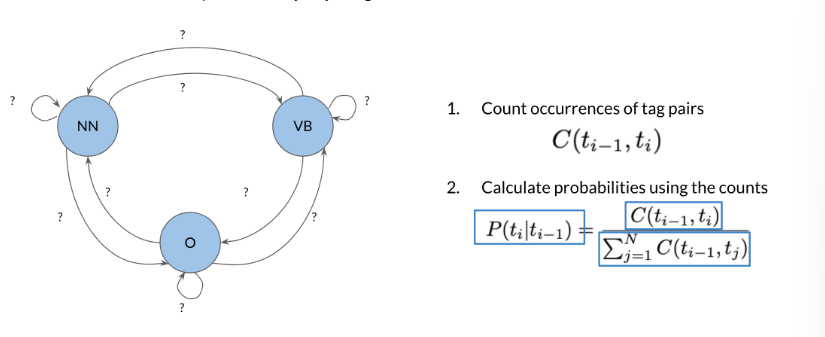

### Fill ma trận A

Để điền ma trận chuyển tiếp, ta phải theo dõi số lần mỗi tag được xuất hiện trước các tag khác:

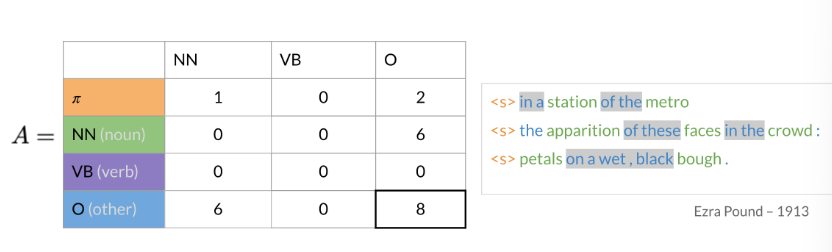

Trong bảng trên, bạn có thể thấy màu xanh lá cây tương ứng với danh từ (NN), màu tím tương ứng với động từ (VB) và màu xanh lam tương ứng với khác (O). Màu cam ($\pi$) tương ứng với trạng thái ban đầu.

Để đi từ O đến NN hay nói cách khác là tính xác xuất P(O | NN) ta tính như sau:

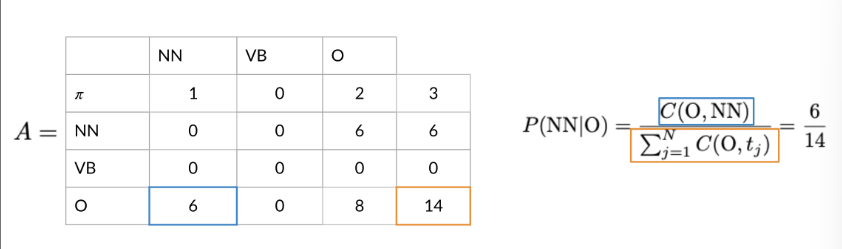

Để khái quát:

$P(t_i | t_{i - 1}) = \frac{count(t_{i - 1}, t_i)}{count(t_{i - 1})}$

Thật không may, đôi khi bạn có thể không nhìn thấy hai thẻ POS ở phía trước nhau. Điều này sẽ cho bạn xác suất bằng 0. Để giải quyết vấn đề này, bạn sẽ “làm mịn” nó như sau:

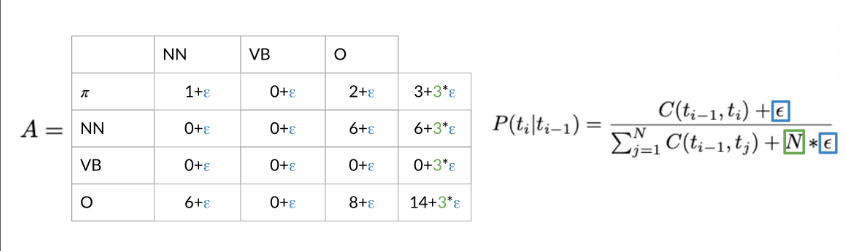

### Fill ma trận B

Để điền vào ma trận, chúng ta sử dụng tính năng smoothing mà ta đã sử dụng lần trước:

$P(w_i | t_i) = \frac{count(t_i, w_i) + \epsilon}{count(t_i) + \epsilon * V}$

với V là số lượng từ vựng trong tập dữ liệu.

### Thuật toán Viterbi

Thuật toán này sử dụng Transition matrix và Emission matrix như sau:

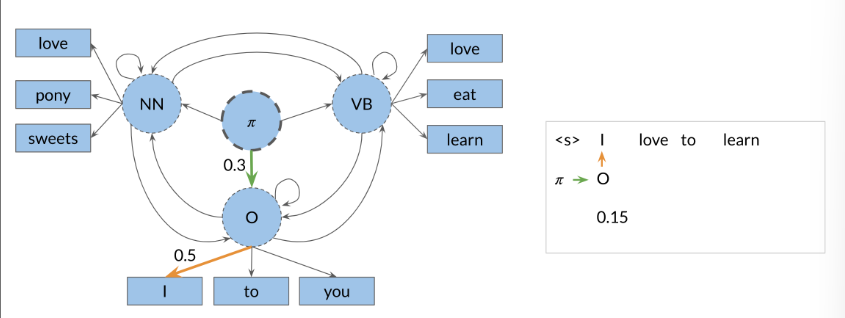

Để đi từ $\pi$ đến NN, ta nhân transition probability với emission probability và chọn ra xác suất lớn nhất và được kết quả là 0.15. Ta tiếp tục làm như vậy với tất cả các từ cho dến khi kết thúc câu.

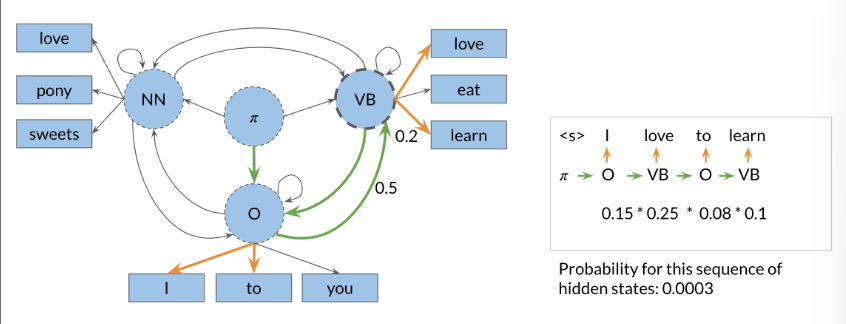

Sao đó ta chọn ra chuỗi có xác suất cao nhất

### Khởi tạo Viterbi

Bây giờ ta điền vào ma trận C và D (Auxiliary matrices) có (num_tags, num_words). Ma trận này sẽ có các xác suất cho bạn biết mỗi từ thuộc về phần nào của lời nói.

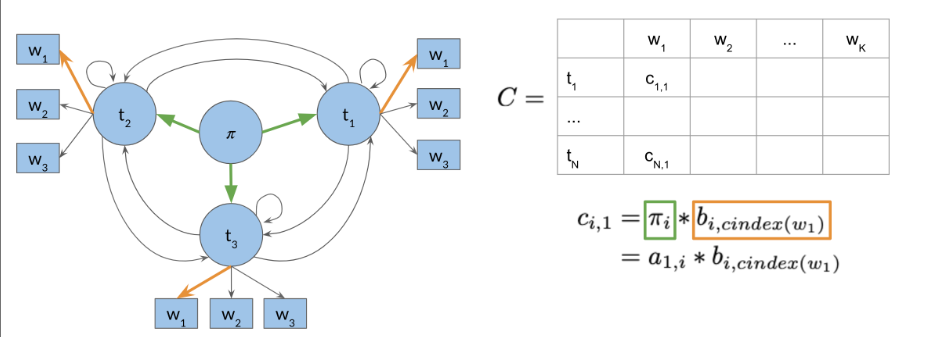

Bây giờ để điền vào cột đầu tiên, ta đang cố đi từ cái tag 1 (t) đi tới word 1(w). Với cột đầu tiên $c_{1, 1}$ là tích của transition probability và emission probability.

$$c_{1, 1} = \pi_1 * B_1(w_1)$$

Vì xác suất ban đầu của bạn được chứa trong hàng đầu tiên của ma trận chuyển tiếp A, nên nó tương tự với:

$$c_{1, 1} = a_{1, 1} * B_1(w_1)$$

Với *cindex* trả lại vị trí cột và ma trận B cho từ đó.

Còn trong ma trận D, ta chứa label đại diện cho các trạng thái khác nhau mà bạn đang duyệt qua khi tìm chuỗi các phần có khả năng xảy ra nhất của thẻ lời nói cho chuỗi từ đã cho, từ $w_{1,1}$ cho tới $w_{1, k}$.

Và khi bắt đầu, ta sẽ khởi tạo 2 ma trận rỗng vì chưa có phần trước nào của thẻ POS.

### Viterbi Forward Pass

Với ma trận C:

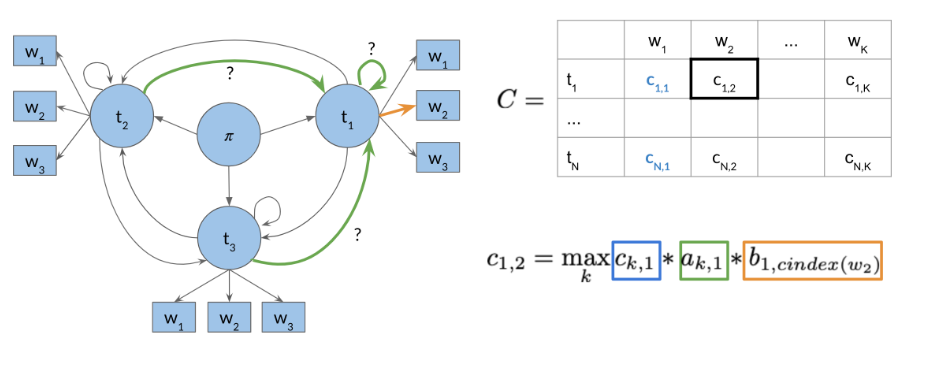

Để fill hết các cell trong hình trên, ta sẽ lấy max k của ô trước đó, nhân với transition probability của POS thứ k sang POS đầu tiên nhân với emission probability của POS thứ k cho từ đầu tiên.

Còn ma trận D:


Bây giờ để điền vào ma trận D, bạn sẽ theo dõi argmax của nơi bạn đến như sau:

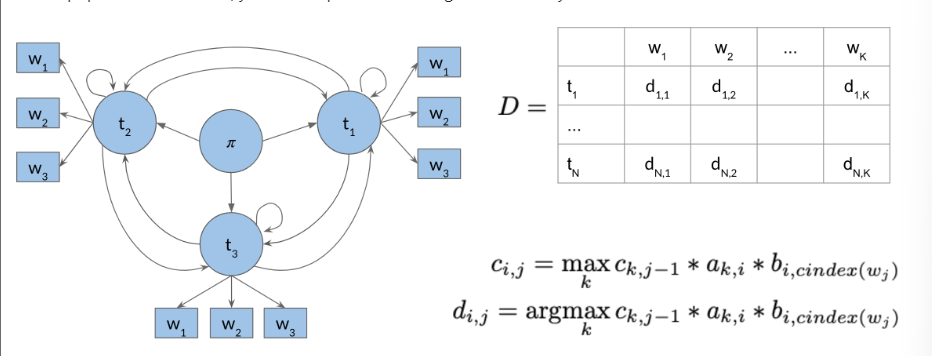

Lưu ý rằng sự khác biệt duy nhất giữa, đó là ở phần trước bạn tính xác suất và ở phần sau, bạn theo dõi chỉ mục của hàng nơi xác suất đó đến từ đó. Vì vậy, bạn theo dõi xem k nào đã được sử dụng để có được xác suất tối đa đó.

### Viterbi Backward Pass

Sau khi ta biết được cách tính các tham số A, B, C và D, ta sẽ ghép chúng lại với nhau và tính đạo hàm ngược của chúng

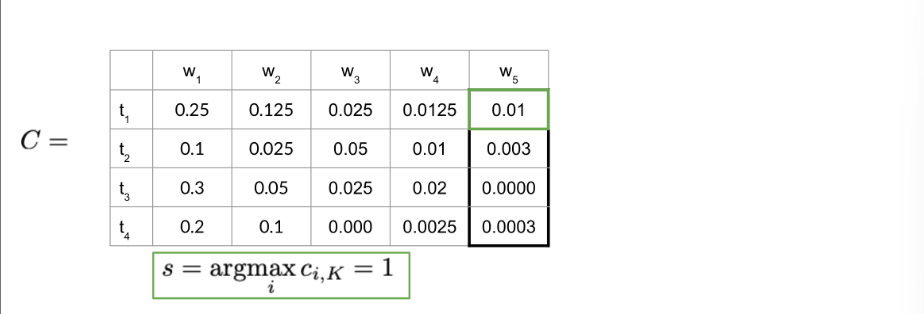

Phương trình trên chỉ cung cấp cho bạn chỉ số của hàng cao nhất trong cột cuối cùng của C. Khi đã có được điều đó, bạn có thể tiếp tục và bắt đầu sử dụng ma trận D như sau:

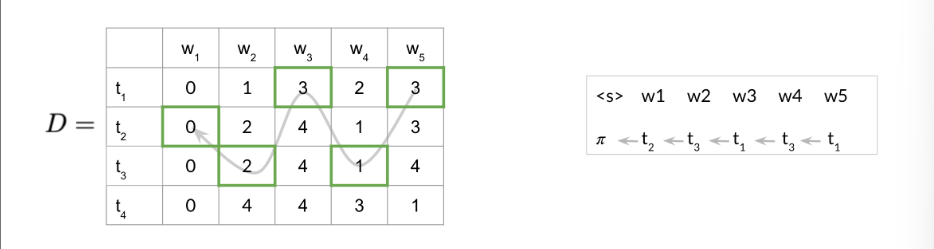